In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("E:\\Azure\Crosssell Prediction\\train.csv")
test = pd.read_csv("E:\\Azure\Crosssell Prediction\\test.csv")

train.shape,test.shape

((381109, 12), (127037, 11))

In [7]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [11]:
data = pd.concat([train,test], axis = 0)
data = data.drop('id',axis = 1)
data.shape

(507368, 11)

In [12]:
data.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0
5,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0.0
6,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0.0
7,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1.0
8,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0.0
9,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507368 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                507368 non-null  object 
 1   Age                   507368 non-null  int64  
 2   Driving_License       507368 non-null  int64  
 3   Region_Code           507368 non-null  float64
 4   Previously_Insured    507368 non-null  int64  
 5   Vehicle_Age           507368 non-null  object 
 6   Vehicle_Damage        507368 non-null  object 
 7   Annual_Premium        507368 non-null  float64
 8   Policy_Sales_Channel  507368 non-null  float64
 9   Vintage               507368 non-null  int64  
 10  Response              380331 non-null  float64
dtypes: float64(4), int64(4), object(3)
memory usage: 46.5+ MB


In [14]:
data.isnull().sum()

Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
dtype: int64

In [15]:
data.isnull().sum()*100/len(data)

Gender                   0.000000
Age                      0.000000
Driving_License          0.000000
Region_Code              0.000000
Previously_Insured       0.000000
Vehicle_Age              0.000000
Vehicle_Damage           0.000000
Annual_Premium           0.000000
Policy_Sales_Channel     0.000000
Vintage                  0.000000
Response                25.038434
dtype: float64

In [16]:
data.dtypes

Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                float64
dtype: object

In [17]:
data.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,507368.000000,507368.000000,507368.000000,507368.000000,507368.000000,507368.000000,507368.000000,380331.000000
mean,38.802522,0.997938,26.406707,0.458699,30376.093329,111.993486,154.337607,0.122491
std,15.497347,0.045358,13.229159,0.498292,16280.380866,54.240823,83.666687,0.327852
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24365.000000,26.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39354.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000,1.000000


In [18]:
data['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [19]:
data['Response'].unique()

array([ 1.,  0., nan])

In [20]:
data['Response'] = data['Response'].fillna(f"{data['Response'].mode()}")
data['Response'].unique()

array([1.0, 0.0, '0    0.0\ndtype: float64'], dtype=object)

In [21]:
data['Response'] = data['Response'].replace({'0    0.0\ndtype: float64' : 0})

In [22]:
data.select_dtypes(include='object').head()

,Gender,Vehicle_Age,Vehicle_Damage
0,Male,> 2 Years,Yes
1,Male,1-2 Year,No
2,Male,> 2 Years,Yes
3,Male,< 1 Year,No
4,Female,< 1 Year,No


## EDA

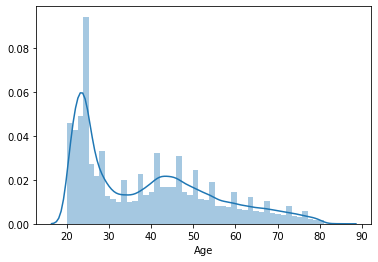

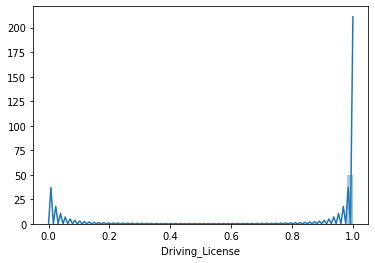

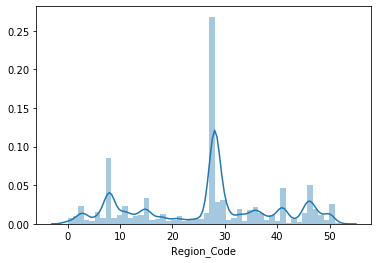

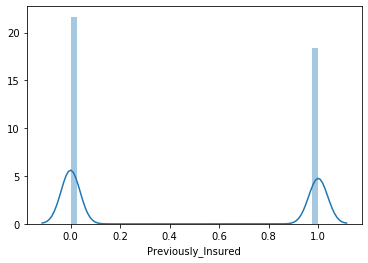

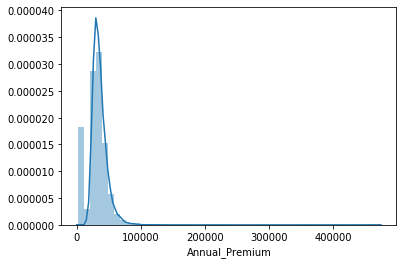

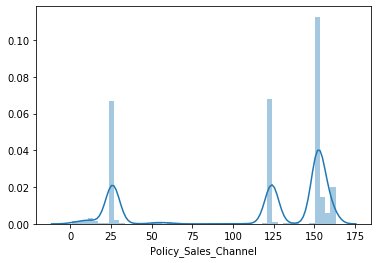

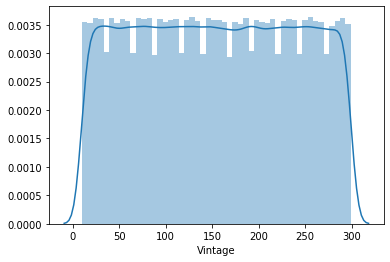

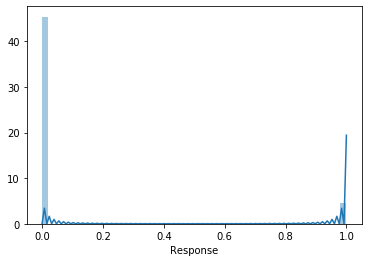

In [23]:
for col in data.select_dtypes(exclude='object'):
    sns.distplot(data[col])
    plt.show()

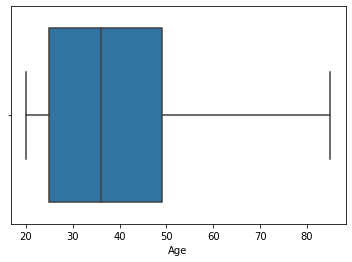

In [24]:
sns.boxplot(data['Age'])

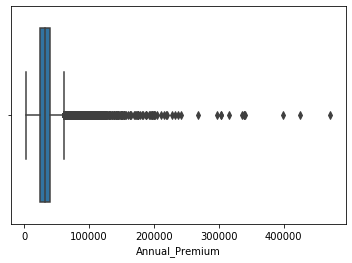

In [25]:
sns.boxplot(data['Annual_Premium'])

(8.0, 1.0)

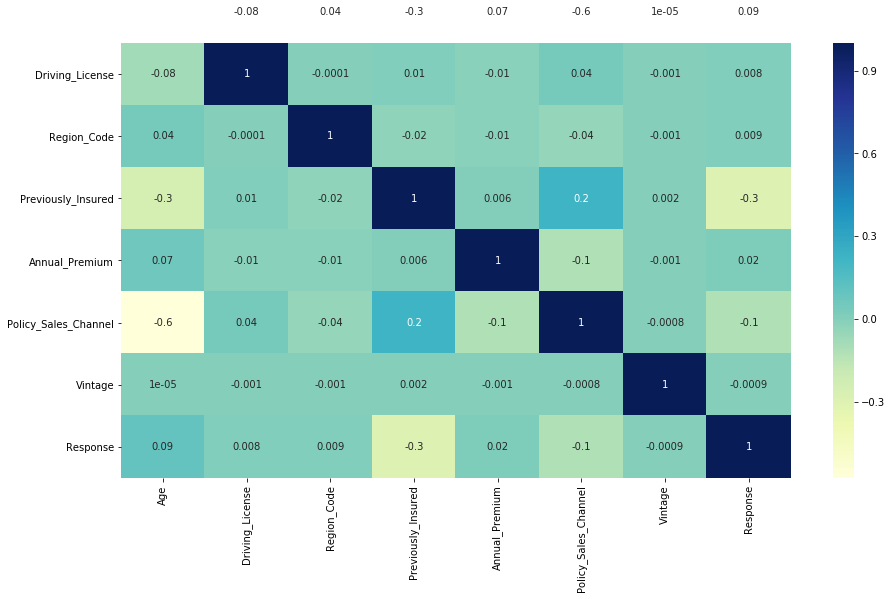

In [26]:
plt.figure(figsize = (15,8))
ax = sns.heatmap(data.corr(), annot = True,  fmt='.1g',cmap = 'YlGnBu')
top, bottom = ax.get_ylim()
ax.set_ylim(top +0.5, bottom +0.5)

(8.0, 1.0)

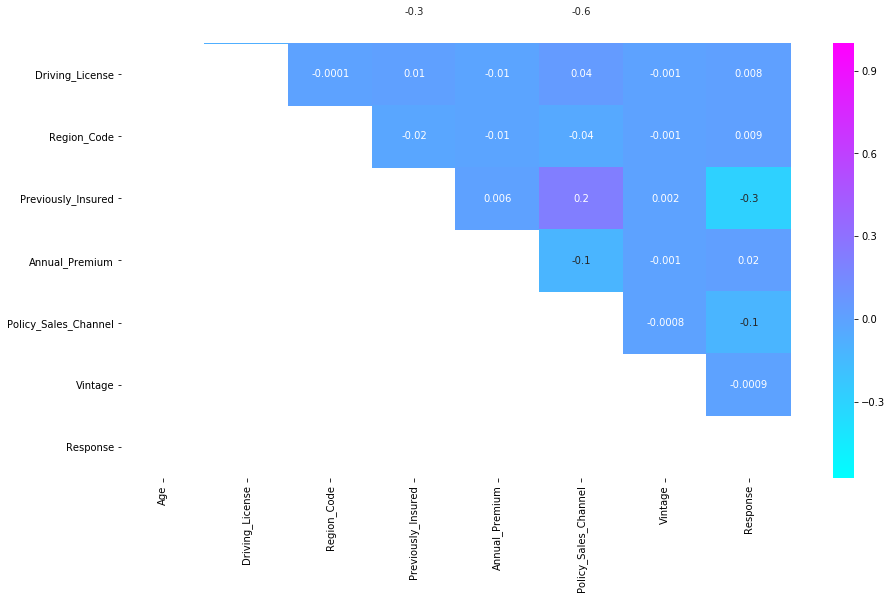

In [27]:
plt.figure(figsize = (15,8))
mask = np.tril(data.corr())
ax = sns.heatmap(data.corr(), annot = True,  fmt='.1g',cmap = 'cool', mask = mask)
top, bottom = ax.get_ylim()
ax.set_ylim(top +0.5, bottom +0.5)

In [28]:
from sklearn.preprocessing import LabelEncoder
leb = LabelEncoder()

In [29]:
for col in data.select_dtypes(include  = 'object'):
    data[col] =  leb.fit_transform(data[col])

## MinMaxScaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data).round(3), columns = data.columns)
data_scaled.head(10)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1.0,0.369,1.0,0.538,0.0,1.0,1.0,0.081,0.154,0.716,1.0
1,1.0,0.862,1.0,0.058,0.0,0.0,0.0,0.066,0.154,0.599,0.0
2,1.0,0.415,1.0,0.538,0.0,1.0,1.0,0.076,0.154,0.059,1.0
3,1.0,0.015,1.0,0.212,1.0,0.5,0.0,0.055,0.932,0.668,0.0
4,0.0,0.138,1.0,0.788,1.0,0.5,0.0,0.053,0.932,0.100,0.0
5,0.0,0.062,1.0,0.635,0.0,0.5,1.0,0.000,0.981,0.574,0.0
6,1.0,0.046,1.0,0.212,0.0,0.5,1.0,0.044,0.932,0.827,0.0
7,0.0,0.554,1.0,0.538,0.0,0.0,1.0,0.063,0.154,0.215,1.0
8,0.0,0.062,1.0,0.058,1.0,0.5,0.0,0.053,0.932,0.062,0.0
9,0.0,0.185,1.0,0.115,1.0,0.5,0.0,0.056,0.932,0.242,0.0


## Build Model

In [31]:
from sklearn import ensemble, tree, linear_model,preprocessing, model_selection, metrics
import xgboost

In [32]:
train = data_scaled[:len(train)]
test = data_scaled[len(train):]

train.shape, test.shape

((380331, 11), (127037, 11))

In [33]:
X = train.drop('Response' ,axis = 1)
y = train['Response']

In [34]:
X_train,X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size = 0.15, random_state = 200)

In [35]:
X_train.shape,X_test.shape

((323281, 10), (57050, 10))

In [36]:
y_train.shape, y_test.shape

((323281,), (57050,))

## Decision Tree

In [37]:
model_DT = tree.DecisionTreeRegressor()
model_DT.fit(X_train,y_train)

DecisionTreeRegressor()

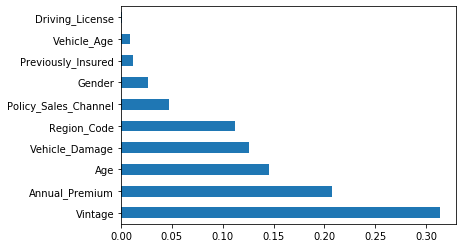

In [38]:
pd.Series(model_DT.feature_importances_,index=X_train.columns).sort_values(ascending=False).plot(kind = 'barh')

In [39]:
pred_DT = model_DT.predict(X_test)
Score_DT = metrics.roc_auc_score(y_test,pred_DT)
print("Roc_Auc_Score : ", Score_DT)

Roc_Auc_Score :  0.6061238880869412


## LightGBM

In [40]:
import lightgbm as lgb

In [41]:
model_LGB = lgb.LGBMRegressor()
model_LGB.fit(X_train,y_train)

LGBMRegressor()

In [42]:
pred_LGB = model_LGB.predict(X_test)
Score_LGB = metrics.roc_auc_score(y_test,pred_LGB)
print("Roc_Auc_Score : ", Score_LGB)

Roc_Auc_Score :  0.857878095434649


## Random Forest

In [45]:
model_RFR = ensemble.RandomForestRegressor()
model_RFR.fit(X_train,y_train)

RandomForestRegressor()

In [46]:
pred_RFR = model_RFR.predict(X_test)
Score_RFR = metrics.roc_auc_score(y_test,pred_RFR)
print("Roc_Auc_Score : ", Score_RFR)

Roc_Auc_Score :  0.8306746822116089


## AdaBoostRegressor

In [47]:
model_ABR = ensemble.AdaBoostRegressor()
model_ABR.fit(X_train,y_train)

AdaBoostRegressor()

In [48]:
pred_ABR = model_ABR.predict(X_test)
Score_ABR = metrics.roc_auc_score(y_test,pred_ABR)
print("Roc_Auc_Score : ", Score_ABR)

Roc_Auc_Score :  0.8407152431719653


## BaggingRegressor

In [49]:
model_BR = ensemble.BaggingRegressor()
model_BR.fit(X_train,y_train)

BaggingRegressor()

In [50]:
pred_BR = model_BR.predict(X_test)
Score_BR = metrics.roc_auc_score(y_test,pred_BR)
print("Roc_Auc_Score : ", Score_BR)

Roc_Auc_Score :  0.7888362836002942


## ExtraTreesRegressor

In [51]:
model_ETR = ensemble.ExtraTreesRegressor()
model_ETR.fit(X_train,y_train)

ExtraTreesRegressor()

In [52]:
pred_ETR = model_ETR.predict(X_test)
Score_ETR = metrics.roc_auc_score(y_test,pred_ETR)
print("Roc_Auc_Score : ", Score_ETR)

Roc_Auc_Score :  0.8156956333860913


## GradientBoostingRegressor

In [53]:
model_GBR = ensemble.ExtraTreesRegressor()
model_GBR.fit(X_train,y_train)

ExtraTreesRegressor()

In [54]:
pred_GBR = model_GBR.predict(X_test)
Score_GBR = metrics.roc_auc_score(y_test,pred_GBR)
print("Roc_Auc_Score : ", Score_GBR)

Roc_Auc_Score :  0.8148995008038168


## XGBRegressor

In [55]:
model_XGBR = xgboost.XGBRegressor()
model_XGBR.fit(X_train,y_train)

[20:27:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [56]:
pred_XGBR = model_XGBR.predict(X_test)
Score_XGBR = metrics.roc_auc_score(y_test,pred_XGBR)
print("Roc_Auc_Score : ", Score_XGBR)

Roc_Auc_Score :  0.8552380931090884


## XGBRFRegressor

In [57]:
model_XGBRF = xgboost.XGBRFRegressor()
model_XGBRF.fit(X_train,y_train)

[20:27:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()

In [58]:
pred_XGBRF = model_XGBRF.predict(X_test)
Score_XGBRF = metrics.roc_auc_score(y_test,pred_XGBRF)
print("Roc_Auc_Score : ", Score_XGBRF)

Roc_Auc_Score :  0.8366108407016634


## RandomizedSearchCV

In [59]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 20)]

boosting_type = ['gbdt', 'dart','goss','rf']

max_depth = [int(x) for x in np.linspace(10, 50,5)]


learning_rate = [0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86]


random_grid = { 'boosting_type': boosting_type,
                'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth}
print(random_grid)

{'boosting_type': ['gbdt', 'dart', 'goss', 'rf'], 'n_estimators': [200, 242, 284, 326, 368, 410, 452, 494, 536, 578, 621, 663, 705, 747, 789, 831, 873, 915, 957, 1000], 'learning_rate': [0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51, 0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86], 'max_depth': [10, 20, 30, 40, 50]}


In [60]:
rf=lgb.LGBMRegressor()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter = 100,cv=2,verbose=1,
                               random_state=100,n_jobs=-1)

In [ ]:
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 22.6min


In [107]:
rf_randomcv.best_estimator_

LGBMRegressor(gamma=3.1, learning_rate=0.01, max_depth=10, n_estimators=831)

In [108]:
rf_randomcv.best_params_

{'n_estimators': 831,
 'max_depth': 10,
 'learning_rate': 0.01,
 'gamma': 3.1,
 'boosting_type': 'gbdt'}

In [109]:
pred_rf = rf_randomcv.predict(X_test)
Score_rf = metrics.roc_auc_score(y_test,pred_rf)
print("Roc_Auc_Score : ", Score_rf)

Roc_Auc_Score :  0.8593144357684872


In [61]:
model_LGB2 = lgb.LGBMRegressor(learning_rate=0.01, max_depth=10, n_estimators=831)
model_LGB2.fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves


LGBMRegressor(learning_rate=0.01, max_depth=10, n_estimators=831)

In [62]:
pred_LGB2 = model_LGB2.predict(X_test)
Score_LGB2 = metrics.roc_auc_score(y_test,pred_LGB2)
print("Roc_Auc_Score : ", Score_LGB2)

Roc_Auc_Score :  0.8581622583219368


# Output

In [5]:
out = pd.read_csv("E:\\Azure\\Crosssell Prediction\\sample_submission_iA3afxn.csv")
out.head()

,id,Response
0,381110,0
1,381111,0
2,381112,0
3,381113,0
4,381114,0


In [115]:
out['Response'] = model_LGB2.predict(test.drop('Response',axis = 1))

In [116]:
out.to_csv("E:/sample_submissionLGB2.csv")